# Unit 2.3: Demonstrating Measurement of Pauli Eigenstates

Pauli operators ($X$, $Y$, $Z$, and the identity $I$) form a complete basis for any observable in a quantum system. 

This means any observable can be decomposed as a linear combination of Pauli operators, making them fundamental building blocks for measurement.

Each Pauli operator/matrix has two eigenstates:

$Z$: $∣0\rangle$, $∣1\rangle$

$X$: $|+\rangle = \frac{∣0\rangle+∣1\rangle}{\sqrt{2}}$, $|-\rangle = \frac{∣0\rangle - ∣1\rangle}{\sqrt{2}}$

$Y$: $∣i\rangle = \frac{∣0\rangle + i ∣1\rangle}{\sqrt{2}}$, $∣−i\rangle = \frac{∣0\rangle − i∣1\rangle}{\sqrt{2}}$

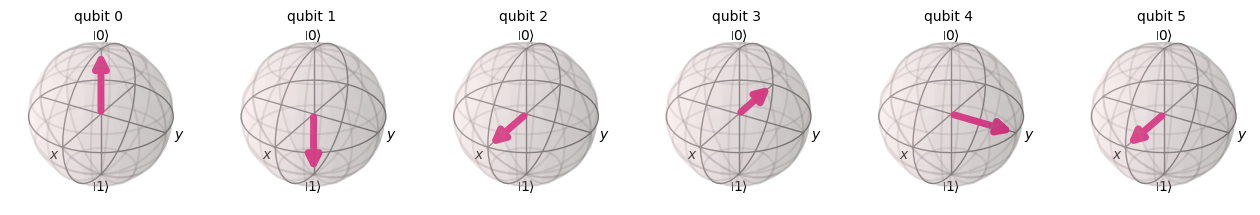

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
 
qc = QuantumCircuit(6)
# Qubit 0 & 1 in Z basis eigenstates |0> and |1>
                    # |0>; Qubit 0 starts in |0>
qc.x(1)             # |1>; Pauli-X gate (NOT wrt computational basis |0>,|1>) flips state to |1>

# Qubit 2 & 3 in X basis eigenstates |+> and |->
qc.h(2)             # |+>; Hadamard gate takes state |0> to |+>
qc.x(3)             # |->; Flip to |1>
qc.h(3)             #      Hadamard gate takes |1> to |->

# Qubit 4 & 5 in Y basis eigenstates |0> and |1>
qc.h(4)             # Pauli-Y gate maps |0> to i|1>;  
qc.p(3.1415/2, 4)   # |i>
#qc.h(5)
#qc.p(-3.1415/2, 5)  # |-i>
qc.sdg(5)
qc.h(5)

state = Statevector(qc)
plot_bloch_multivector(state)



This experiment prepares a qubit in the eigenstates of $X$, $Y$, and $Z$ and measures in the computational basis.

* Z-basis: Standard measurement in the computational basis.

* X-basis: Hadamard gate applied before measurement converts $X$-eigenstates to $Z$-eigenstates.

* Y-basis: $S^†H$ applied before measurement converts $Y$-eigenstates to $Z$-eigenstates.

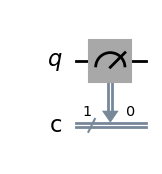

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile
from qiskit.visualization import plot_histogram

# Create quantum circuits for measuring X, Y, Z eigenstates
circuits = []

# Z-basis (computational basis)
qc_z = QuantumCircuit(1, 1)
qc_z.measure(0, 0)
circuits.append(qc_z)
qc_z.draw("mpl")

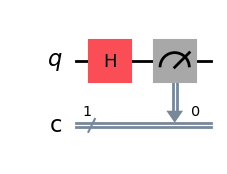

In [3]:
# X-basis (Hadamard before measurement)
qc_x = QuantumCircuit(1, 1)
qc_x.h(0)
qc_x.measure(0, 0)
circuits.append(qc_x)
qc_x.draw("mpl")

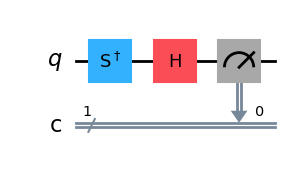

In [4]:
# Y-basis (S† and Hadamard before measurement)
qc_y = QuantumCircuit(1, 1)
qc_y.sdg(0)
qc_y.h(0)
qc_y.measure(0, 0)
circuits.append(qc_y)
qc_y.draw("mpl")

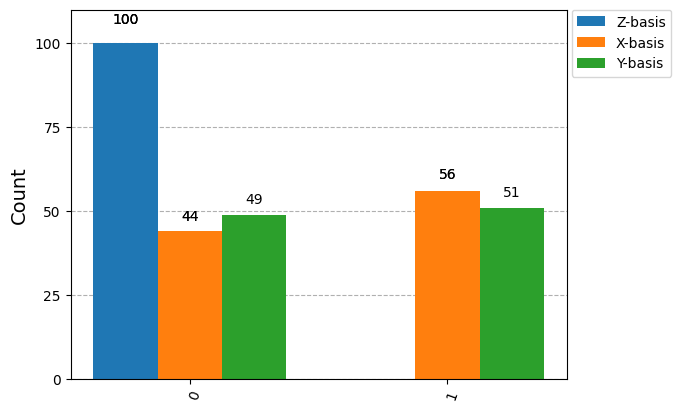

In [5]:
# Simulate the circuits
backend = AerSimulator()
results = backend.run(circuits, shots=100).result()

# Display results
plot_histogram([results.get_counts(qc) for qc in circuits], legend=['Z-basis', 'X-basis', 'Y-basis'])

### 2. Observing the Effect of Phase in Qiskit

This circuit applies a phase gate and a Hadamard transform to see how relative phase affects measurement.

* A Hadamard creates an equal superposition.
* A phase gate $P(\pi/4)$ shifts the relative phase.
* A second Hadamard converts the phase into a measurable probability shift.


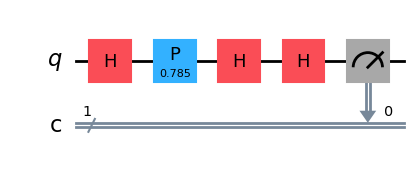

In [6]:
qc = QuantumCircuit(1, 1)
qc.h(0)             # Create equal superposition
qc.p(3.1415/4, 0)   # Apply a phase shift of π/4
qc.h(0)             # Interference step
qc.h(0)             # Rotate to X-basis
qc.measure(0, 0)
qc.draw("mpl")

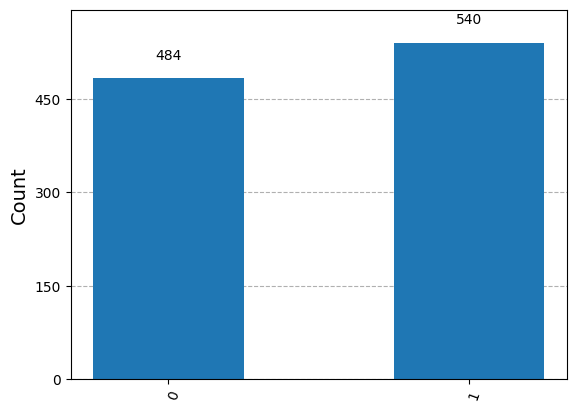

In [7]:
# Simulate
backend = AerSimulator()
result = backend.run(qc, shots=1024).result()
plot_histogram(result.get_counts())

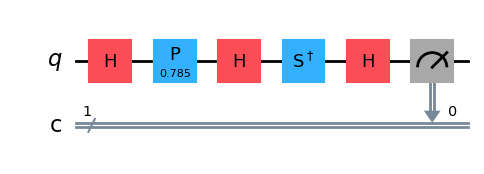

In [8]:
qc = QuantumCircuit(1, 1)
qc.h(0)             # Create equal superposition
qc.p(3.1415/4, 0)   # Apply a phase shift of π/4
qc.h(0)             # Interference step
qc.sdg(0)           # Rotate to Y-basis
qc.h(0)
qc.measure(0, 0)
qc.draw("mpl")

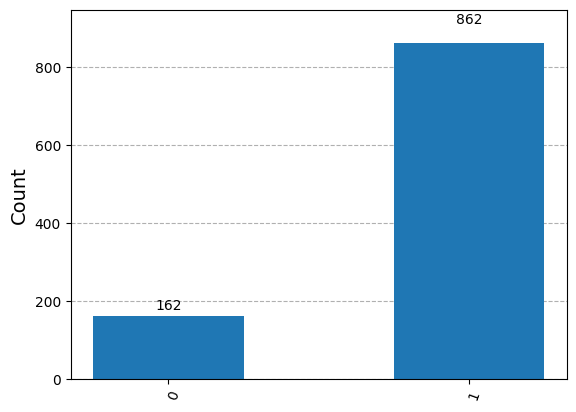

In [9]:
# Simulate
result = backend.run(qc, shots=1024).result()
plot_histogram(result.get_counts())

### 3. Measuring Bell State Correlations

This circuit creates a Bell state and measures in different bases.

* A Hadamard on qubit 0 creates a superposition.

* A CNOT gate entangles the qubits into the Bell state $|\Phi^+\rangle$.

* Measurement in the computational basis shows perfect correlation (either 00 or 11)



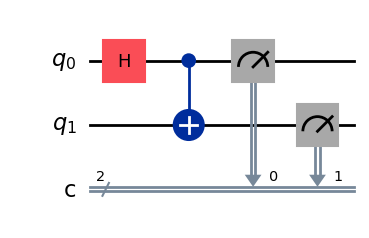

In [10]:
from qiskit.quantum_info import state_fidelity

# Create a Bell pair
qc_bell = QuantumCircuit(2, 2)
qc_bell.h(0)        # Apply Hadamard to the first qubit
qc_bell.cx(0, 1)    # Create entanglement
qc_bell.measure([0, 1], [0, 1])
qc_bell.draw("mpl")

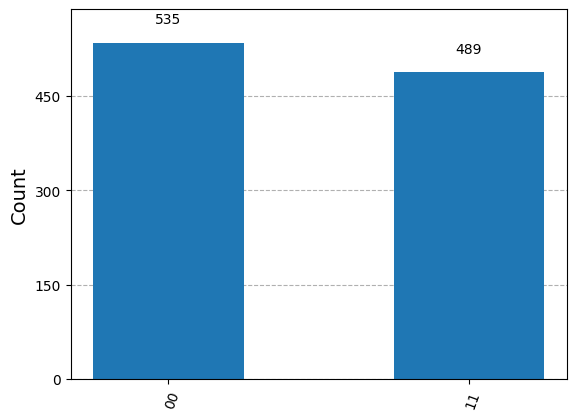

In [11]:
# Simulate
backend = AerSimulator()
result = backend.run(qc_bell, shots=1024).result()
plot_histogram(result.get_counts())

### 4. Measuring Correlated Observables (e.g., $X_1 X_2$​, $Z_1 Z_2$​)

To distinguish Bell states, we measure correlations.

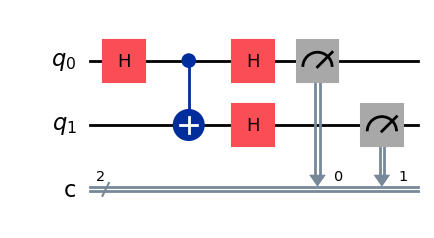

In [12]:
qc_corr = QuantumCircuit(2, 2)
qc_corr.h(0)        # Apply Hadamard to the first qubit
qc_corr.cx(0, 1)    # Create entanglement

# Measure in the X basis (Hadamard before measurement)
qc_corr.h(0)
qc_corr.h(1)
qc_corr.measure([0, 1], [0, 1])
qc_corr.draw("mpl")

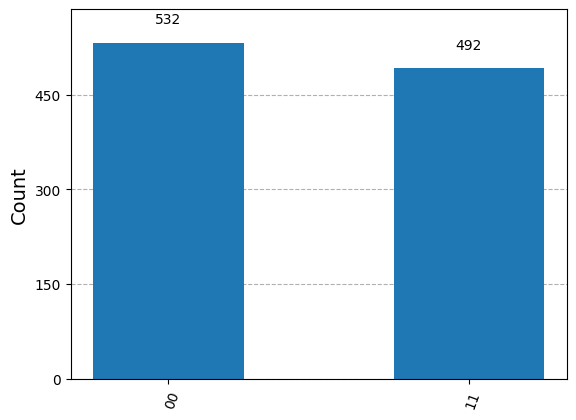

In [13]:
# Simulate
backend = AerSimulator()
result = backend.run(qc_corr, shots=1024).result()
plot_histogram(result.get_counts())
